# ¡Hola  !🙋🏻‍♂️

Te escribe Lisandro Saez, soy revisor de código en Tripleten y tengo el agrado de revisar el proyecto que entregaste.

Para simular la dinámica de un ambiente de trabajo, si veo algún error, en primer instancia solo los señalaré, dándote la oportunidad de encontrarlos y corregirlos por tu cuenta. En un trabajo real, el líder de tu equipo hará una dinámica similar. En caso de que no puedas resolver la tarea, te daré una información más precisa en la próxima revisión.

Encontrarás mis comentarios más abajo - **por favor, no los muevas, no los modifiques ni los borres**.

¿Cómo lo voy a hacer? Voy a leer detenidamente cada una de las implementaciones que has llevado a cabo para cumplir con lo solicitado. Verás los comentarios de esta forma:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si todo está perfecto.
</div>


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta. Se aceptan uno o dos comentarios de este tipo en el borrador, pero si hay más, deberías hacer las correcciones. Es como una tarea de prueba al solicitar un trabajo: muchos pequeños errores pueden hacer que un candidato sea rechazado.
</div>

<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma (no te preocupes, no es obligatorio):

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Muchas gracias por tus comentarios Lisandro, seguiré echandole ganas al aprendizaje.
    
Hola, muchas gracias por tus comentarios y la revisión.
</div>

¡Empecemos!

# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

In [1]:
# importar librerías
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
# leer conjuntos de datos en los DataFrames
df_instacart_orders = pd.read_csv('/datasets/instacart_orders.csv',sep = ";")
df_products = pd.read_csv('/datasets/products.csv',sep = ";")
df_aisles = pd.read_csv('/datasets/aisles.csv',sep = ";")
df_departments = pd.read_csv('/datasets/departments.csv',sep = ";")
df_order_products = pd.read_csv('/datasets/order_products.csv',sep = ";")



<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Bien hecho! Siempre es importante que pasemos el set de datos que estamos usando a `DataFrame`!</div>




In [17]:
# mostrar información del DataFrame
df_instacart_orders.info()
print(df_instacart_orders.sample(5))
print()
print(df_instacart_orders['user_id'].nunique())
print()
print(df_instacart_orders['order_id'].nunique())
print()
print(df_instacart_orders.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB
        order_id  user_id  order_number  order_dow  order_hour_of_day  \
170467   2650559   148927            11          2                 13   
406301   2356678     3652            30          1                  7   
94164    1507483    65250             9          5                 11   
190636   2764127   133204             4          6                 13   
323865   1633484    12470             3   

In [15]:
# mostrar información del DataFrame
df_products.info()
print(df_products.sample(5))
print()
print(df_products['product_id'].nunique())
print()
print(df_products['product_name'].nunique())
print()
print(df_products.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
       product_id                                       product_name  \
41302       41303     Almond Breeze Reduced Sugar Vanilla Almondmilk   
37126       37127                               Pesto Genovese 6.5oz   
42251       42252                              French Sandwich Rolls   
15610       15611  Antacid- Plus Anti-Gas- Advanced- Multi-Sympto...   
27482       27483                                     Borlotti Beans   

       aisle_id  department_id  
41302        84             16  
37126       104             13  
42251        43              3  
15610        70    

In [5]:
# mostrar información del DataFrame
df_aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [14]:
# mostrar información del DataFrame
print(df_departments.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes
None


In [12]:
# mostrar información del DataFrame
df_order_products.info(show_counts=True)
print(df_order_products.sample(5))
print()
print(df_order_products['order_id'].nunique())
print()
print(df_order_products['product_id'].nunique())
print()
print(df_order_products.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB
         order_id  product_id  add_to_cart_order  reordered
3148991   1567717       40145               35.0          1
742642    1006251       49098               11.0          1
2978542    978998       16826                5.0          1
2971385    582528       14999               10.0          1
142497     217798       25633               11.0          0

450046

45573

           order_id    product_id  add_to_cart_order     reordered
count  4.545007e+06  4.545007e+06       4.544171e+06  4.545007e+06
mean   1.711166e+06  2.558

<div class="alert alert-block alert-warning">
<b>Comentario del revisor </b> <a class="tocSkip"></a>
    
* Atención con el dataset `order`, debido a que es grande, `.info()` no está mostrando las cantidades en las variables. Para ello tienes que usar el parámetro `show_counts=True`.
    
* Es una buena práctica hacer un `.describe()` para entender un poco mejor de qué se trata cada tabla.

</div>

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 1. Descripción de los datos.

En la primer tabla "insta_cart_orders" solo tenemos valores ausentes en la columna de "days_since_prior_order" que corresponde a la información del número de días transcurridos desde que este cliente hizo su pedido anterior, por lo que revisaremos si en realidad son valores ausentes y si es posible eliminar esta columna, además de que esta tiene formato float que parecería que no es lo más apropiado. Las demás columnas tienen formato int64 que parece ser el correcto. También podemos ver que tenemos 157437 usuarios diferentes y se colocaron 478952 ordenes.

En el segundo data frame que corresponde a los productos vemos que la información esta completa excepto la columna "product_name", por lo que lo más probable es que tengamos que completar con el método fillna o un búcle para sustituirlos. También podemos ver que tenemos 49694 ids de productos diferentes y de esos 48436 tienen nombre.

El tercer y cuarto data frames "aisle" y "departments" están completos y corresponden a los pasillos y están completos.

El quinto data frame "order_products" que corresponde a los artículo pedido en un pedido, a tiene valores faltantes en la columna "add_to_cart_order" y se refiere al orden secuencial en el que se añadió cada artículo en el carrito, además de que esta como valor float, lo cual parece estar erroneo.Por lo que revisaremos si se puede borrar al parecer un dato que no es relevante.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Te felicito por la precisión que muestras a la hora de realizar las observaciones!</div>



# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.

Para los valores ausentes usaremos el método isna() junto con el método sum() y posteriomente en caso de ser necesario utilizaremos el método fillna() para sustituir estos valores ausentes o si así es conveniente usaremos el método dropna() para eliminar información que no se requiera y que este incompleta.

Tendremos que revisar los data frames revisando si hay pedidos duplicados filtrandolos utlizando el método duplicated(). Una vez identificados, revisaremos el porque están duplicados, por ejemplo si es por cuestión de mayúsculas o mínusculas usaremos el método lower(). Después usaremos el método drop_duplicates() con el parámetro subset= en caso de ser necesario para quitar los duplicados que no sean necesarios.



<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Bien hecho! Es sumamente importante elaborar un plan de solución antes de ponerse a escribir el código.</div>

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).



### `instacart_orders` data frame

In [9]:
# Revisa si hay pedidos duplicados
print(df_instacart_orders[df_instacart_orders.duplicated()])

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
145574    794638    50898            24          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
266232   1782114   106752             1          3                  2   
273805   1112182   202304            84          3                  2   
284038   2845099    31189            11          3                  2   
311713   1021560    53767             3          3                  2   
321100    408114    68324             4          3                  2   
323900   1919531   191501            32          3                  2   
345917   2232988    82565             1          3                  2   
371905    391768    57671            19          3                  2   
394347    467134    63189            21          3                  2   
411408   1286742   183220            48          3 

¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?
Si tenemos 15 líneas, lo que tienen en común es que la información en las columnas "order_dow" y "order_hour_of_day" es igual en todas.

In [10]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.

print(df_instacart_orders[(df_instacart_orders['order_dow'] == 3) & (df_instacart_orders['order_hour_of_day'] == 2)])
print() 
#Estoy usando este código para también ver así los duplicados:
print(df_instacart_orders[df_instacart_orders.duplicated()])

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
4838     2766110   162084            41          3                  2   
5156     2190225   138285            18          3                  2   
15506     553049    58599            13          3                  2   
18420     382357   120200            19          3                  2   
24691     690242    77357             2          3                  2   
...          ...      ...           ...        ...                ...   
457013   3384021    14881             6          3                  2   
458816    910166   164782            18          3                  2   
459635   1680532   106435             6          3                  2   
468324    222962    54979            59          3                  2   
477526   2592344    46860            38          3                  2   

        days_since_prior_order  
4838                      16.0  
5156                      11.0  
15506                   


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Está muy bien que contextualices los valores duplicados!
</div>

¿Qué sugiere este resultado?
Si tenemos 15 duplicados 

In [11]:
# Elimina los pedidos duplicados
df_instacart_orders = df_instacart_orders.drop_duplicates()


In [12]:
# Vuelve a verificar si hay filas duplicadas
df_instacart_orders.duplicated().sum()

0

In [13]:
# Vuelve a verificar si hay IDs duplicados de pedidos
df_instacart_orders['order_id'].duplicated().sum()

0

Describe brevemente tus hallazgos y lo que hiciste con ellos:
Después de revisar el data frame de las ordene, nos dimos cuenta que si había 15 duplicados por lo que los eliminamos.

### `products` data frame

In [14]:
# Verifica si hay filas totalmente duplicadas
df_products.duplicated().sum()

0

In [15]:
# Verifica si hay IDs duplicadas de productos
df_products['product_id'].duplicated().sum()

0

In [16]:
# Revisa si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
print('Tenemos en total duplicados:',df_products['product_name'].duplicated().sum())
print()
df_products['product_name'] = df_products['product_name'].str.upper()
df_products.sample(3)

Tenemos en total duplicados: 1257



,product_id,product_name,aisle_id,department_id
39995,39996,SAN MARZANO TOMATOES WITH BASIL,81,15
33709,33710,MATZOS MOONSTRIPS ONION POPPY,33,6
45903,45904,VITAMIN CODE 50 & WISER WOMEN'S MULTIVITAMIN,47,11


In [28]:
# Revisa si hay nombres duplicados de productos no faltantes
df_products['product_name'].duplicated().sum()

1361

Describe brevemente tus hallazgos y lo que hiciste con ellos.
Solo se encontraron valores duplicados en los nombres de los productos (1361 artículos) no es sus id's por lo que aunque tegan nombres iguales debe tratarse de productos diferentes con el mismo nombre, por ejemplo que contengan diferente cantidad pero sea el mismo producto. Debido a esto considero que debemos dejar los nombres duplicados ya que su id si es único. 

### `departments` data frame

In [17]:
# Revisa si hay filas totalmente duplicadas
df_departments.duplicated().sum()

0

In [18]:
# Revisa si hay IDs duplicadas de productos
df_departments['department_id'].duplicated().sum()

0

Describe brevemente tus hallazgos y lo que hiciste con ellos.
En el data frame de departments no tenemos duplicados.

### `aisles` data frame

In [19]:
# Revisa si hay filas totalmente duplicadas
df_aisles.duplicated().sum()

0

In [20]:
# Revisa si hay IDs duplicadas de productos
df_aisles['aisle_id'].duplicated().sum()

0

Describe brevemente tus hallazgos y lo que hiciste con ellos.
En el data frame de aisles no tenemos duplicados.

### `order_products` data frame

In [21]:
# Revisa si hay filas totalmente duplicadas
df_order_products.duplicated().sum()

0

In [22]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
df_order_products[['order_id','product_id']] .duplicated().sum()

0

Describe brevemente tus hallazgos y lo que hiciste con ellos.
No descubrimos valores duplicados, ya que las columnas "add_to_cart_order" y "reordered" tienen valores que se repiten en cada orden no los tomamos en cuenta. Y en las filas"order_id" y "product_id" no se encontraron duplicados de mismas ordenes o mismos productos en esa orden.

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [23]:
# Encuentra los valores ausentes en la columna 'product_name'
print(df_products['product_name'].isna().sum())
print()
print(df_products[df_products['product_name'].isna()])

1258

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


Describe brevemente cuáles son tus hallazgos. 
Tenemos 1258 valores ausentes en la columna de "product_name", pareciera que todos estan en el mismo pasillo y departamento (aisle_id 100 y department_id 21)

In [24]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
df_products[df_products['product_name'].isna()]['aisle_id'].unique()

array([100])

Describe brevemente cuáles son tus hallazgos.

De acuerdo con unique() el valor único en la columna aisle_id si es el pasillo con ID 100

In [25]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
df_products[df_products['product_name'].isna()]['department_id'].unique()

array([21])

Describe brevemente cuáles son tus hallazgos.

De acuerdo con unique() el valor único en la columna del department_id si es en el departamento con ID 21

In [26]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
print(df_aisles.loc[99,['aisle_id','aisle_id']])
print()
print(df_departments[df_departments['department_id'] == 21])
print()
print(df_aisles[df_aisles['aisle_id'] == 100])


aisle_id    100
aisle_id    100
Name: 99, dtype: object

    department_id department
20             21    missing

    aisle_id    aisle
99       100  missing


Describe brevemente cuáles son tus hallazgos.
Este departamento y pasillo se puede referir a productos faltantes en la tienda y que en su sistema los mandan a ese pasillo llamado "missing" lo que pudiera explicar por que no tienen nombre los productos.

In [27]:
# Completa los nombres de productos ausentes con 'Unknown'
df_products['product_name'].fillna('Unknown', inplace=True)
print(df_products['product_name'].isna().sum())
print()
print(df_products[df_products['product_name'] == 'Unknown'].sample(5))

0

       product_id product_name  aisle_id  department_id
5091         5092      Unknown       100             21
3776         3777      Unknown       100             21
5173         5174      Unknown       100             21
19683       19684      Unknown       100             21
32209       32210      Unknown       100             21



<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Te felicito por haber eliminado los NaNs! Es una parte fundamental del análisis de datos!
</div>

Describe brevemente tus hallazgos y lo que hiciste con ellos.
Cambiamos el valor ausente del nombre de los productos en la tabla de productos por "Unkown" para poder usar esa información posteriormente.

### `orders` data frame

In [28]:
# Encuentra los valores ausentes
df_instacart_orders.isna().sum()

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64

In [29]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
df_instacart_orders[df_instacart_orders['order_number'] > 1]['days_since_prior_order'].isna().sum()

0

Describe brevemente tus hallazgos y lo que hiciste con ellos.
De acuerdo a la información vemos que tenemos 28817 valores ausentes en la columna "days_since_prior_order", buscamos en particular si había valores ausentes que fueran de un pedido posterior al primero pero no encontramos con ese parametro.

### `order_products` data frame

In [30]:
# Encuentra los valores ausentes
df_order_products.isna().sum()

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

In [31]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
df_order_products['add_to_cart_order'].min(),df_order_products['add_to_cart_order'].max()

(1.0, 64.0)

Describe brevemente cuáles son tus hallazgos.
Tenemos 836 valores ausentes en la columna 'add_to_cart_order' que se refiere al orden secuencial en el que se añadió cada artículo en el carrito y vemos que el máximo de artículos que se agregaron en el carrito fueron 64. 

In [32]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
order_id_con_ausentes = df_order_products[df_order_products['add_to_cart_order'].isna()]['order_id']
print(order_id_con_ausentes)

737        2449164
9926       1968313
14394      2926893
16418      1717990
30114      1959075
            ...   
4505662    1800005
4511400    1633337
4517562     404157
4534112    1673227
4535739    1832957
Name: order_id, Length: 836, dtype: int64


In [33]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos? No, ningún pedido con valor ausente tiene más de 64 productos.

df_order_products[df_order_products['add_to_cart_order'].isnull()]['order_id']
print(df_order_products[df_order_products['add_to_cart_order'] > 64]['order_id'].count())

# **** También lo probé con .query a ver si me salía lo mismo:****

filtered_df = df_order_products.query('add_to_cart_order > 64') 
order_ids_with_missing_values = filtered_df[filtered_df['add_to_cart_order'].isna()]['order_id']
print(order_ids_with_missing_values.count())

# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
print(df_order_products[df_order_products['add_to_cart_order'].isna()].groupby('order_id').count())

# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
print(df_order_products[df_order_products['add_to_cart_order'].isna()].groupby('order_id').count()['product_id'].min())

0
0
          product_id  add_to_cart_order  reordered
order_id                                          
9310               1                  0          1
61355             63                  0         63
102236            31                  0         31
129627             5                  0          5
165801             6                  0          6
...              ...                ...        ...
2999801            6                  0          6
3125735           22                  0         22
3308010           51                  0         51
3347453            7                  0          7
3383594            5                  0          5

[70 rows x 3 columns]
1


Describe brevemente cuáles son tus hallazgos.

Podemos ver que tenemos 836 valores ausentes y estos se encuentran solo en a columna de 'add_to_cart_order' que se refiere al orden secuencial en el que se añadió cada artículo en el carrito y vemos que el máximo de artículos que se agregaron en el carrito fueron 64, ninguno de los pedidos con valores ausentes tiene más de 64 artículos. También vemos que casi todos los valores ausentes están en diferentes pedidos.

In [34]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
df_order_products['add_to_cart_order'] = df_order_products['add_to_cart_order'].fillna(999).astype(int)
df_order_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 138.7 MB


Describe brevemente tus hallazgos y lo que hiciste con ellos.
Rellenamos los valores ausentes de la columna 'add_to_cart_oder' con 999 para que estuviesen completos y al mismo tiempo los convertimos a enteros por que no tenía caso que fueran valores float64.




<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy correcto todo tu trabajo con respecto a valores ausentes. Bien hecho!
</div>


## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos

Logramos visualizar más detalladamente la información que nos daban las tablas y también pudimos limpiar la inforamación de ellas para que nos pueda ser más útil en nuestros analisis; revisamos valores duplicados y se corrigieron datos como valores ausentes.


# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [35]:
print(df_instacart_orders['order_hour_of_day'].min(), df_instacart_orders['order_hour_of_day'].max())

0 23


In [36]:
print(df_instacart_orders['order_dow'].min(),df_instacart_orders['order_dow'].max())

0 6


Escribe aquí tus conclusiones
Vemos que los valores de las columnas si oscilan entre los valores que se piden.


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Está muy bien la comprobación que hiciste sobre la sensibilidad de los valores.
</div>


### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

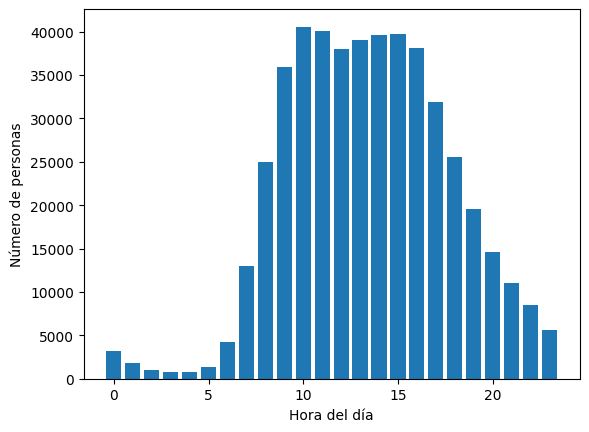

In [37]:
#Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
import pandas as pd
from matplotlib import pyplot as plt
df_personas_vs_hr = df_instacart_orders.groupby('order_hour_of_day').size().reset_index(name='num_personas')
plt.bar(df_personas_vs_hr['order_hour_of_day'], df_personas_vs_hr['num_personas']) 
plt.xlabel('Hora del día')
plt.ylabel('Número de personas')
plt.show()


Escribe aquí tus conclusiones
Vemos que la hr en la que las personas hacen más pedido es a las 10 am y de ahí se mantiene masomenos igual hasta las 4 pm cuando empiezan a bajar los pedidos.

### [A3] ¿Qué día de la semana compran víveres las personas?

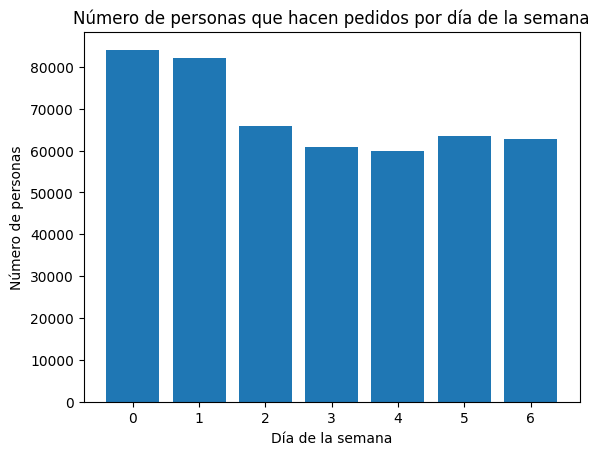

In [38]:
#Crea un gráfico que muestre qué día de la semana la gente hace sus compras
df_personas_vs_dia = df_instacart_orders.groupby('order_dow').size().reset_index(name='num_personas')
plt.bar(df_personas_vs_dia['order_dow'], df_personas_vs_dia['num_personas'])
plt.xlabel('Día de la semana')
plt.ylabel('Número de personas')
plt.title('Número de personas que hacen pedidos por día de la semana')
plt.show()


Escribe aquí tus conclusiones
Vemos que el mayor numero de pedidos se hace en domingo y después el lunes, el día que menos se hacen pedidos es el jueves.

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

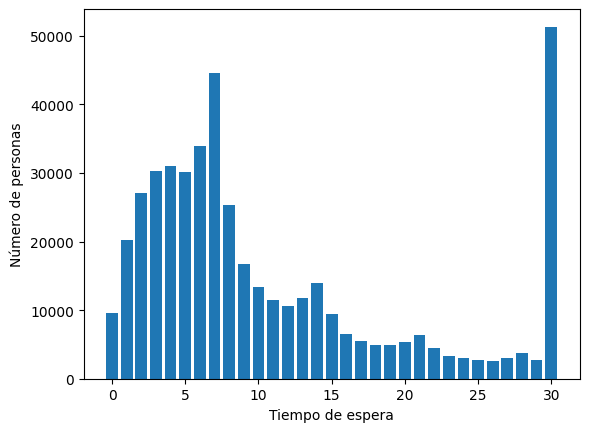

In [39]:
#Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.
df_personas_vs_espera = df_instacart_orders.groupby('days_since_prior_order').size().reset_index(name='num_personas')
plt.bar(df_personas_vs_espera['days_since_prior_order'], df_personas_vs_espera['num_personas'])
plt.xlabel('Tiempo de espera')
plt.ylabel('Número de personas')
plt.show()

Escribe aquí tus conclusiones

Vemos que la mayoría de las personas tarda al menos 30 días más en poner su siguiente pedido aunque una porción muy importante lo pone al rededor de una semana después de que la puso y la siguiente porción más importante de numero de personas pone su orden los primeros días después de que puso la primera.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buena esta sección. Los gráficos son muy claros y descriptivos. Muy bien al usar títulos y descripciones de los ejes.
</div>



# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

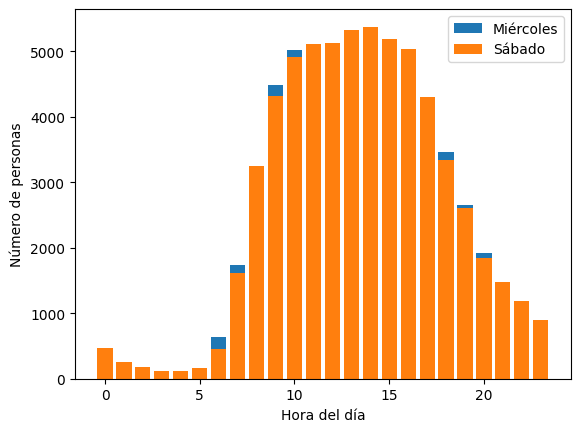

In [40]:
df_miercoles = df_instacart_orders[df_instacart_orders['order_dow'] == 3]
df_sabado = df_instacart_orders[df_instacart_orders['order_dow'] == 6]
df_miercoles_plot = df_miercoles.groupby('order_hour_of_day').size().reset_index(name='num_personas')
df_sabado_plot = df_sabado.groupby('order_hour_of_day').size().reset_index(name='num_personas')
plt.bar(df_miercoles_plot['order_hour_of_day'], df_miercoles_plot['num_personas'], label='Miércoles')
plt.bar(df_sabado_plot['order_hour_of_day'], df_sabado_plot['num_personas'], label='Sábado')
plt.xlabel('Hora del día')
plt.ylabel('Número de personas')
plt.legend()
alpha=0.1
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Está muy bien la comparación de ambos días en general. De nuevo, la visualización es muy clara.
</div>



Escribe aquí tus conclusiones

En general la hora de la compra es muy similar en los dos días pudiendose observar que el miércoles empiezan a poner ordenes más gente más temprano pero también hay un poco más de ordenes más tarde en comparación con el sábado.

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

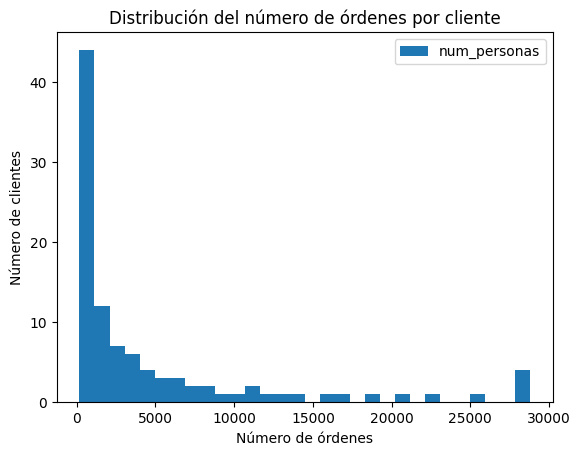

In [41]:
#Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron
#solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente
df_personas_vs_orden = df_instacart_orders.groupby('order_number').size().reset_index(name='num_personas')
df_personas_vs_orden.plot(kind='hist', x='order_number', y='num_personas', bins=30, title='Distribución del número de órdenes por cliente')
plt.xlabel('Número de órdenes')
plt.ylabel('Número de clientes')
plt.show()

Escribe aquí tus conclusiones
Podemos ver que la mayoría de las personas hicieron menos de 1000 pedidos y muy pocas hicieron más de 10000, un grupo pequeño puso casi 30000.

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [42]:
df_productos_mas_populares = df_order_products.groupby('product_id')['product_id'].count().reset_index(name='count')
df_productos_mas_populares = df_productos_mas_populares.sort_values(by='count', ascending=False).head(20)

In [78]:
df_productos_mas_populares = pd.merge(df_productos_mas_populares, df_products[['product_id', 'product_name']], on='product_id', how='left')
#aquí quise crear una nueva columna con los valores en que más se repetía el product_id en los pedidos:
df_productos_mas_populares['count_product_id'] = df_productos_mas_populares['count']

In [79]:
print(df_productos_mas_populares)

    product_id  count            product_name_x            product_name_y  \
0        24852  66050                    BANANA                    BANANA   
1        13176  53297    BAG OF ORGANIC BANANAS    BAG OF ORGANIC BANANAS   
2        21137  37039      ORGANIC STRAWBERRIES      ORGANIC STRAWBERRIES   
3        21903  33971      ORGANIC BABY SPINACH      ORGANIC BABY SPINACH   
4        47209  29773      ORGANIC HASS AVOCADO      ORGANIC HASS AVOCADO   
5        47766  24689           ORGANIC AVOCADO           ORGANIC AVOCADO   
6        47626  21495               LARGE LEMON               LARGE LEMON   
7        16797  20018              STRAWBERRIES              STRAWBERRIES   
8        26209  19690                     LIMES                     LIMES   
9        27845  19600        ORGANIC WHOLE MILK        ORGANIC WHOLE MILK   
10       27966  19197       ORGANIC RASPBERRIES       ORGANIC RASPBERRIES   
11       22935  15898      ORGANIC YELLOW ONION      ORGANIC YELLOW ONION   

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Excelente trabajo!La lista del TOP 20 es muy completa, has logrado no solo mostrar cuáles son los productos, sino resumir la cantidad de órdenes de cada producto de manera muy clara.
</div>


Escribe aquí tus conclusiones

Vemos que todos los productos más populares son del departamento de frutas, y adicional solo la leche esta incluida en estos 20 productos más populares.

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [45]:
df_order_products['add_to_cart_order'].mean()

8.533887406554049

Text(0.5, 1.0, 'Distribución de "add_to_cart_order"')

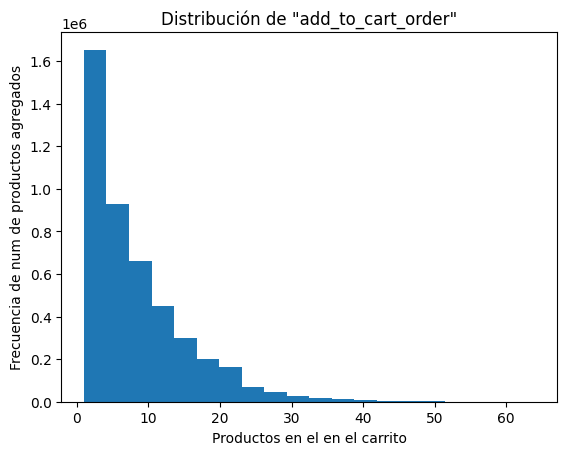

In [22]:
df_order_products['add_to_cart_order'].plot(kind='hist', bins=20)
plt.xlabel('Productos en el en el carrito')
plt.ylabel('Frecuencia de num de productos agregados')
plt.title('Distribución de "add_to_cart_order"')

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Este histograma no nos brinda nada de info, quizás aumentando la cantidad de `bins` mejora un poco. Si no, deberíasas revisar más a fondo el código.
</div>


Escribe aquí tus conclusiones

Aumente el numero de bins a 20 para tener una visualización más amplia y agregue los nombres a los ejes para poder entender mejor los datos además del nombre del gráfico.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Bien corregido! Se que puede ser un poco engorroso y hasta frustrante, pero son estas pequeñas cosas que le dan un toque extra de profesionalismo a tu trabajo que siempre se agradece!</div>



### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [47]:
df_productos_mas_populares_porfrec = df_order_products.groupby('product_id')['reordered'].sum().sort_values(ascending=False).head(20)

In [48]:
df_productos_mas_populares_porfrec = pd.merge(df_productos_mas_populares_porfrec, df_products[['product_id', 'product_name']], on='product_id', how='left')

In [49]:
print(df_productos_mas_populares_porfrec)

    product_id  reordered              product_name
0        24852      55763                    BANANA
1        13176      44450    BAG OF ORGANIC BANANAS
2        21137      28639      ORGANIC STRAWBERRIES
3        21903      26233      ORGANIC BABY SPINACH
4        47209      23629      ORGANIC HASS AVOCADO
5        47766      18743           ORGANIC AVOCADO
6        27845      16251        ORGANIC WHOLE MILK
7        47626      15044               LARGE LEMON
8        27966      14748       ORGANIC RASPBERRIES
9        16797      13945              STRAWBERRIES
10       26209      13327                     LIMES
11       22935      11145      ORGANIC YELLOW ONION
12       24964      10411            ORGANIC GARLIC
13       45007      10076          ORGANIC ZUCCHINI
14       49683       9538            CUCUMBER KIRBY
15       28204       8989        ORGANIC FUJI APPLE
16        8277       8836  APPLE HONEYCRISP ORGANIC
17       39275       8799       ORGANIC BLUEBERRIES
18        58

Escribe aquí tus conclusiones

Podemos ver que los 20 productos que se vuelven a pedir con más frecuencia son también del departamento de frutas y verduras aunque con diversas variantes de los 20 que más se compran en promedio.

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [64]:
df_tasa_conversion = df_order_products.groupby('product_id')['reordered'].sum() / df_order_products.groupby('product_id')['reordered'].count()

In [65]:
df_tasa_conversion = pd.merge(df_tasa_conversion,df_products[['product_id', 'product_name']], on='product_id', how='left')

In [69]:
print(df_tasa_conversion.sample(10))

       product_id  reordered  \
29841       32541   0.500000   
34618       37750   0.214286   
28601       31185   0.333333   
8349         9145   0.833333   
21513       23458   0.571429   
4121         4514   0.611940   
33390       36398   0.800000   
20749       22639   0.333333   
26040       28373   0.694444   
13029       14255   0.000000   

                                            product_name  
29841                                      PORK MARINADE  
34618                                 SPECIAL DARK COCOA  
28601                RED BEANS & RICE NEW ORLEANS RECIPE  
8349                      FUSILLI BUCATI NO. 98 MACARONI  
21513  CREAMY MILK CHOCOLATE WITH CRISPED RICE. CHOCO...  
4121                REDUCED FAT COLBY-JACK CHEESE STICKS  
33390                 DIET HALF & HALF LEMONADE/ICED TEA  
20749                  GLUTEN FREE ORIGINAL 3 SEED BREAD  
26040                        ORIGINAL ROTISSERIE CHICKEN  
13029                           SOY GINGER ASIAN NOODLES 

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo utilizando métricas tan complejas como lo son las proporciones. Bien hecho!</div>


Escribe aquí tus conclusiones

Con esta tabla "df_tasa_conversion" podemos ver la tasa de conversión de cada producto dandonos cuenta del porcentaje que se vuelve a pedir ese producto.

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [73]:
df_tasa_conversion = pd.merge(df_instacart_orders, df_order_products, on='order_id', how='left')
df_tasa_conversion = df_tasa_conversion.groupby('user_id')['reordered'].sum() / df_tasa_conversion.groupby('user_id')['reordered'].count()

In [72]:
print(df_tasa_conversion)

user_id
2         0.038462
4         0.000000
5         0.666667
6         0.000000
7         0.928571
            ...   
206203    0.222222
206206    0.714286
206207    0.891304
206208    0.696000
206209    0.320000
Name: reordered, Length: 157437, dtype: float64


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con las proporciones! Nuevamente, parecen una métrica más, pero son bastante difíciles de interpretar y mostrar con éxito a veces.</div>


Escribe aquí tus conclusiones

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [85]:
df_princip_articulos_en_carrito = pd.merge(df_order_products,df_productos_mas_populares, on='product_id', how='left')

In [86]:
df_princip_articulos_en_carrito = df_princip_articulos_en_carrito[df_princip_articulos_en_carrito['add_to_cart_order'] == 1].groupby('product_id')['add_to_cart_order'].count().sort_values(ascending=False).head(20)

In [87]:
df_princip_articulos_en_carrito = pd.merge(df_princip_articulos_en_carrito, df_products[['product_id', 'product_name']], on='product_id', how='left')
print(df_princip_articulos_en_carrito)

    product_id  add_to_cart_order                 product_name
0        24852              15562                       BANANA
1        13176              11026       BAG OF ORGANIC BANANAS
2        27845               4363           ORGANIC WHOLE MILK
3        21137               3946         ORGANIC STRAWBERRIES
4        47209               3390         ORGANIC HASS AVOCADO
5        21903               3336         ORGANIC BABY SPINACH
6        47766               3044              ORGANIC AVOCADO
7        19660               2336                 SPRING WATER
8        16797               2308                 STRAWBERRIES
9        27966               2024          ORGANIC RASPBERRIES
10       44632               1914   SPARKLING WATER GRAPEFRUIT
11       49235               1797          ORGANIC HALF & HALF
12       47626               1737                  LARGE LEMON
13         196               1733                         SODA
14       38689               1397     ORGANIC REDUCED F

Escribe aquí tus conclusiones

De los productos más vendidos obtuvimos la suma de cada unos de los productos que pusieron primero en su carrito, así podemos ver que primero fueron los platanos; normales y luego orgánicos y luego la leche.

### Conclusion general del proyecto:

In [ ]:
A pesar de que se veía al principio información muy vaga y sin conexión pudimos obtener valisos datos de las tablas y quedaron funcionales para seguir sacando más información.
Por ejemplo, obtuvimos la información de los productos más vendidos aunque no venía ese dato originalmente, los productos que más se vuelven a pedir, información de cuando se hacen más pedidos o cuanto es lo que se pide, etc.
Lo ideal sería poder obtener más información de la tienda para poder hacer más grande este reporte, por ejemplo datos de precios o costos serían muy útiles.


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Realmente tus conclusiones demuestran tu expertise en el tema, te felicito por haberte esforzado tanto en este sprint. Excelente trabajo!</div>



